In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from scipy.sparse import coo_matrix

In [2]:
train_data=pd.read_csv("content_recommendation_data.csv")
train_data.head()

,product_id,name,price,category,brand,imageURL,description,rating,tags
0,1,Smartphone,48980,Electronics,Samsung,https://example.com/images/electronics_1.jpg,High performance with sleek design,3.0,"smartphone, electronics, samsung, high, perfor..."
1,2,Laptop,57149,Electronics,Apple,https://example.com/images/electronics_2.jpg,Long battery life and vibrant display,4.0,"laptop, electronics, apple, long, battery, lif..."
2,3,Bluetooth Speaker,1505,Electronics,Samsung,https://example.com/images/electronics_3.jpg,Portable and immersive sound experience,3.4,"bluetooth, speaker, electronics, samsung, port..."
3,4,Smartwatch,6500,Electronics,Xiaomi,https://example.com/images/electronics_4.jpg,Stay connected with smart notifications,3.7,"smartwatch, electronics, xiaomi, stay, connect..."
4,5,Headphones,2065,Electronics,Samsung,https://example.com/images/electronics_5.jpg,Noise cancellation and clear audio,4.4,"headphones, electronics, samsung, noise, cance..."


In [3]:
train_data.columns

Index(['product_id', 'name', 'price', 'category', 'brand', 'imageURL',
       'description', 'rating', 'tags'],
      dtype='object')

In [4]:
train_data.shape

(25, 9)

In [5]:
train_data.isnull().sum()

product_id     0
name           0
price          0
category       0
brand          0
imageURL       0
description    0
rating         0
tags           0
dtype: int64

Text(0.5, 1.0, 'Most Popular items')

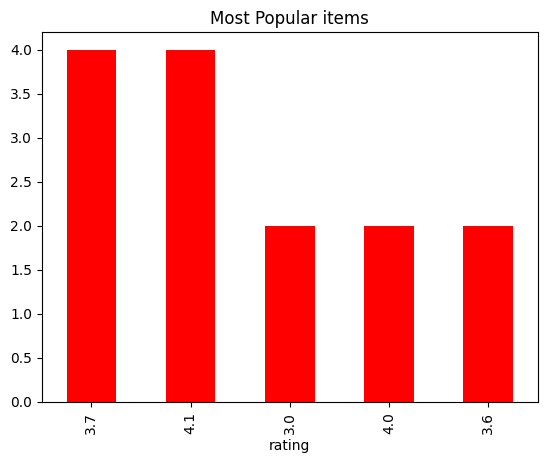

In [6]:
popular_items=train_data['rating'].value_counts().head(5)
popular_items.plot.bar(color='red')
plt.title("Most Popular items")

# Rating based Recommnedation 


In [7]:
average_rating=train_data.groupby(['name','category','price', 'brand', 'imageURL'])['rating'].mean().reset_index()


In [8]:
top_rated=average_rating.sort_values(by='rating', ascending=False)
top_rated.head(10)

,name,category,price,brand,imageURL,rating
6,Handbag,Fashion,3555,Gucci,https://example.com/images/fashion_4.jpg,4.9
4,Dumbbells,Fitness,3695,Nike,https://example.com/images/fitness_3.jpg,4.6
11,Microwave Oven,Kitchen,8655,Morphy Richards,https://example.com/images/kitchen_4.jpg,4.5
18,Sofa,Furniture,8320,Urban Ladder,https://example.com/images/furniture_5.jpg,4.5
7,Headphones,Electronics,2065,Samsung,https://example.com/images/electronics_5.jpg,4.4
14,Resistance Bands,Fitness,1045,Decathlon,https://example.com/images/fitness_5.jpg,4.3
22,Treadmill,Fitness,47000,Adidas,https://example.com/images/fitness_2.jpg,4.2
12,Office Chair,Furniture,6070,IKEA,https://example.com/images/furniture_1.jpg,4.1
5,Fitness Tracker,Fitness,3830,Nike,https://example.com/images/fitness_4.jpg,4.1
20,Sunglasses,Fashion,6999,Gucci,https://example.com/images/fashion_5.jpg,4.1


# Content based Recommendation System


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_matrix_content=tfidf_vectorizer.fit_transform(train_data['tags'])
cosine_similarities_content=cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

In [14]:
item_name='Fitness Tracker'
item_index=train_data[train_data['name']==item_name].index[0]

In [15]:
similar_items=list(enumerate(cosine_similarities_content[item_index]))

In [16]:
similar_items=sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items=similar_items[1:10]

recommended_item=[x[0] for x in top_similar_items]

In [17]:
train_data.iloc[recommended_item][['name', 'category', 'brand', 'price', 'rating']]

,name,category,brand,price,rating
5,Yoga Mat,Fitness,Nike,750,3.7
7,Dumbbells,Fitness,Nike,3695,4.6
6,Treadmill,Fitness,Adidas,47000,4.2
9,Resistance Bands,Fitness,Decathlon,1045,4.3
0,Smartphone,Electronics,Samsung,48980,3.0
1,Laptop,Electronics,Apple,57149,4.0
2,Bluetooth Speaker,Electronics,Samsung,1505,3.4
3,Smartwatch,Electronics,Xiaomi,6500,3.7
4,Headphones,Electronics,Samsung,2065,4.4


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    if item_name not in train_data['name'].values:
        print(f"Item '{item_name}' not found in the training data")
        return pd.DataFrame()
    
    tfidf_vectorizer=TfidfVectorizer(stop_words='english')
    tfidf_matrix_content=tfidf_vectorizer.fit_transform(train_data['tags'])
    cosine_similarities_content=cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
    
    item_index=train_data[train_data['name']==item_name].index[0]
    
    similar_items=list(enumerate(cosine_similarities_content[item_index]))
    
    item_index=train_data[train_data['name']==item_name].index[0]
    
    similar_items=list(enumerate(cosine_similarities_content[item_index]))
    
    similar_items=sorted(similar_items, key=lambda x:x[1], reverse=True)
    top_similar_items=similar_items[1:top_n+1]

    recommended_item=[x[0] for x in top_similar_items]
    
    recommended_item_details=train_data.iloc[recommended_item][['name', 'category', 'brand', 'price', 'rating']]
    
    return recommended_item_details

In [19]:
item_name="Bookshelf"
content_based=content_based_recommendations(train_data, item_name, top_n=8)

content_based

,name,category,brand,price,rating
18,Wardrobe,Furniture,Godrej,26125,3.7
19,Sofa,Furniture,Urban Ladder,8320,4.5
16,Study Table,Furniture,Godrej,8499,4.0
15,Office Chair,Furniture,IKEA,6070,4.1
0,Smartphone,Electronics,Samsung,48980,3.0
1,Laptop,Electronics,Apple,57149,4.0
2,Bluetooth Speaker,Electronics,Samsung,1505,3.4
3,Smartwatch,Electronics,Xiaomi,6500,3.7
